In [1]:
import numpy as np
import scipy
import IPython
import matplotlib.pyplot as plt
import librosa

In [2]:
def read_voice(path,rate=None):
    return librosa.load(path,sr=rate)

def play_voice(signal,rate):
    print(f"rate = {rate}")
    IPython.display.display(IPython.display.Audio(signal,rate=rate))
    
def framming(signal,frame_length,hop_size,sample_rate):
    frame_step = hop_size * sample_rate
    signal_lenght = len(signal)
    frame_length = int(round(frame_length))
    frame_step = int(round(frame_step))
    num_frames = int(np.ceil(float(np.abs(signal_lenght - frame_length)) / frame_step))
    pad_signal_length = num_frames * frame_step + frame_length
    z = np.zeros((pad_signal_length - signal_lenght))
    pad_signal = np.append(signal, z) 
    indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
    frames = pad_signal[indices.astype(np.int32, copy=False)]
    return frames

In [3]:
signal,sr = read_voice(path="my_voice.wav",rate=16000)
play_voice(signal=signal,rate=sr)

rate = 16000


# part 2 

#### framing and calculate magnitudes:

In [4]:
frames = framming(signal=signal,frame_length=0.032*sr,hop_size=0.01,sample_rate=sr)
magnitude_frames = abs(np.fft.rfft(frames,512))

#### select 2 vowels

In [5]:
def get_sorted_mean_energy_frames_index(frames):
    mean_frames = np.mean(frames**2 / len(frames),axis=1)    
    return np.argsort(mean_frames) 

In [6]:
get_sorted_mean_energy_frames_index(frames)[-50:]

array([175, 152, 230, 103,  87,  98, 151, 305, 150, 117, 304, 149, 176,
       147, 106,  99, 148, 102, 179, 100, 101, 177, 178,  86, 116, 115,
       114, 107, 113,  85,  84,  70, 112, 109, 108,  83, 111, 110,  82,
        71,  81,  74,  72,  76,  78,  80,  77,  73,  75,  79], dtype=int64)

vowel frames forexample frame with index 72 and 136

In [7]:
play_voice(np.concatenate(frames[:72+1]),rate=sr) # for /A/
play_voice(np.concatenate(frames[:114+1]),rate=sr) # for /a/

vowel_frame1 = frames[72]
vowel_frame2 = frames[114]


rate = 16000


rate = 16000


#### select 2 voiced frames

In [8]:
def get_mean_pithes(magnitud_frames,sample_rate):
    pitches, _ = librosa.piptrack(S=magnitud_frames, sr=sample_rate, threshold=1,ref=np.mean)
    return np.mean(pitches,axis=1)

In [9]:
pitches = get_mean_pithes(magnitud_frames=magnitude_frames,sample_rate=sr)
np.where(pitches>0)

(array([ 58,  59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,
         71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,
         84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,
         97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109,
        110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148,
        149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161,
        162, 163, 164, 166], dtype=int64),)

In [10]:
play_voice(np.concatenate(frames[:105+1]),rate=sr) # for /r/
play_voice(np.concatenate(frames[:155+1]),rate=sr) # for /n/

voiced_frame1 = frames[105] # for /r/
voiced_frame2 = frames[155] # for /n/

rate = 16000


rate = 16000


In [11]:
frame_dict = {
    "vowel_frame1": vowel_frame1,
    "vowel_frame2": vowel_frame2,
    "voiced_frame1": voiced_frame1,
    "voiced_frame2": voiced_frame2,    
}


In [12]:
def get_LPC_coeffience_and_show(frames_dict,LPC_algorithm):
    LPCC_dict = {}
    for frame_name,frame_var in frames_dict.items():
        LPCC_dict[frame_name]=LPC_algorithm(frame_var)
    for frame in LPCC_dict:
        plt.plot(LPCC_dict[frame])
        
    plt.show()
    for frame in LPCC_dict:
        print(frame , ":  \n" , LPCC_dict[frame])
    

In [13]:
def get_toeplitz_matrix(frame):
    corr = np.correlate(frame,frame,mode='full')[len(frame)-1:]
    Rss = toeplitz(corr)
    return Rss

## part 2-a
### LPC with toeplitz matrix and autocorrolation algorithm

In [14]:
from scipy.linalg import toeplitz

def LPCC_with_toeplitz(frame):
    Rss = get_toeplitz_matrix(frame)
    R1 = Rss[0:len(frame)-1,0:len(frame)-1]
    R2 = -Rss[1:,0] 
    return np.matmul(R2,np.linalg.inv(R1))

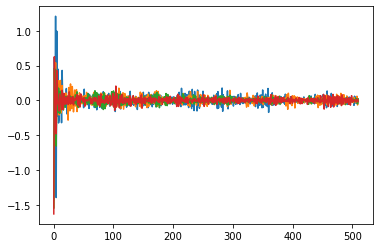

vowel_frame1 :  
 [-1.42723682e+00  6.20992419e-01 -7.24704521e-01  1.20845349e+00
 -1.39779937e+00  9.94041893e-01 -2.24691633e-01  4.47647110e-01
 -3.25536323e-01 -2.67195793e-01  1.87700610e-01 -9.05734800e-02
  1.10667483e-01 -3.21906937e-01  4.29787616e-01 -1.86967979e-02
 -5.32223858e-02 -7.15858582e-02 -5.27705486e-03  7.78226029e-02
 -5.94696214e-02  1.69647186e-01 -1.95478784e-01 -3.04318386e-03
  1.89760069e-02  4.52448164e-02 -5.44844266e-02  1.08585040e-02
  1.18782190e-01 -7.89009914e-02  5.93321154e-02 -6.15910527e-02
 -5.54282895e-02  5.39417704e-02  5.16378217e-02 -4.88507970e-02
 -4.13809142e-03  4.05299048e-02  2.64529739e-03  2.34007366e-02
 -2.01804335e-02 -7.33307740e-02  4.15516376e-02  1.76036801e-02
  3.46494244e-02 -4.06560290e-02 -1.72547311e-03  2.65296064e-02
 -1.45527674e-03  1.95431040e-02 -1.06125434e-01  1.60165483e-01
 -5.25550835e-02 -2.82979002e-02 -1.29600286e-02 -3.33754849e-02
  9.30676741e-02 -6.40351239e-02  9.75507655e-02 -1.16516427e-01
  8.029

In [15]:
get_LPC_coeffience_and_show(frame_dict,LPCC_with_toeplitz)

## part 2-b
### LPC with levinson  algorithm

In [16]:
import spectrum

In [17]:
from scipy.linalg import toeplitz

def LPCC_with_levinson(frame):
    corr = np.correlate(frame,frame,mode='full')[len(frame)-1:]
    return spectrum.levinson.LEVINSON(corr,allow_singularity=True)[0]


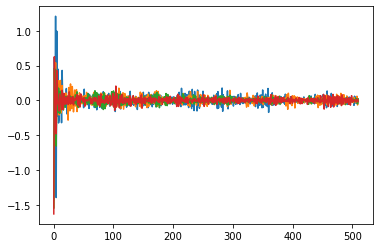

vowel_frame1 :  
 [-1.42723682e+00  6.20992419e-01 -7.24704521e-01  1.20845349e+00
 -1.39779937e+00  9.94041893e-01 -2.24691633e-01  4.47647110e-01
 -3.25536323e-01 -2.67195793e-01  1.87700610e-01 -9.05734800e-02
  1.10667483e-01 -3.21906937e-01  4.29787616e-01 -1.86967979e-02
 -5.32223858e-02 -7.15858582e-02 -5.27705486e-03  7.78226029e-02
 -5.94696213e-02  1.69647186e-01 -1.95478784e-01 -3.04318386e-03
  1.89760069e-02  4.52448164e-02 -5.44844266e-02  1.08585040e-02
  1.18782190e-01 -7.89009914e-02  5.93321154e-02 -6.15910527e-02
 -5.54282895e-02  5.39417704e-02  5.16378217e-02 -4.88507970e-02
 -4.13809142e-03  4.05299048e-02  2.64529739e-03  2.34007366e-02
 -2.01804335e-02 -7.33307740e-02  4.15516376e-02  1.76036801e-02
  3.46494244e-02 -4.06560290e-02 -1.72547311e-03  2.65296064e-02
 -1.45527674e-03  1.95431040e-02 -1.06125434e-01  1.60165483e-01
 -5.25550835e-02 -2.82979002e-02 -1.29600286e-02 -3.33754849e-02
  9.30676741e-02 -6.40351239e-02  9.75507655e-02 -1.16516427e-01
  8.029

In [18]:
get_LPC_coeffience_and_show(frame_dict,LPCC_with_levinson)

# part 2-c

In [19]:
def LPCC_with_built_in(frame):
    return spectrum.lpc(frame)[0]

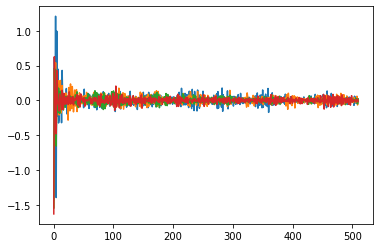

vowel_frame1 :  
 [-1.42723682e+00  6.20992419e-01 -7.24704521e-01  1.20845349e+00
 -1.39779937e+00  9.94041893e-01 -2.24691633e-01  4.47647110e-01
 -3.25536323e-01 -2.67195793e-01  1.87700610e-01 -9.05734800e-02
  1.10667483e-01 -3.21906937e-01  4.29787616e-01 -1.86967979e-02
 -5.32223858e-02 -7.15858582e-02 -5.27705486e-03  7.78226029e-02
 -5.94696213e-02  1.69647186e-01 -1.95478784e-01 -3.04318386e-03
  1.89760069e-02  4.52448164e-02 -5.44844266e-02  1.08585040e-02
  1.18782190e-01 -7.89009914e-02  5.93321154e-02 -6.15910527e-02
 -5.54282895e-02  5.39417704e-02  5.16378217e-02 -4.88507970e-02
 -4.13809142e-03  4.05299048e-02  2.64529739e-03  2.34007366e-02
 -2.01804335e-02 -7.33307740e-02  4.15516376e-02  1.76036801e-02
  3.46494244e-02 -4.06560290e-02 -1.72547311e-03  2.65296064e-02
 -1.45527674e-03  1.95431040e-02 -1.06125434e-01  1.60165483e-01
 -5.25550835e-02 -2.82979002e-02 -1.29600286e-02 -3.33754849e-02
  9.30676741e-02 -6.40351239e-02  9.75507655e-02 -1.16516427e-01
  8.029

In [20]:
get_LPC_coeffience_and_show(frame_dict,LPCC_with_built_in)

# part 3

In [21]:
def get_G(frame):
    Rss = get_toeplitz_matrix(frame)
    A = LPCC_with_levinson(frame)
    G_power_2 = Rss[0][0] - sum([A[k-1]* Rss[0][k] for k in range(1,len(frame))])
    return np.sqrt(G_power_2)

vowel_frame1 :  1.1703188939955693
vowel_frame2 :  0.9323481859285366
voiced_frame1 :  0.6717617549806438
voiced_frame2 :  0.5673890825550819


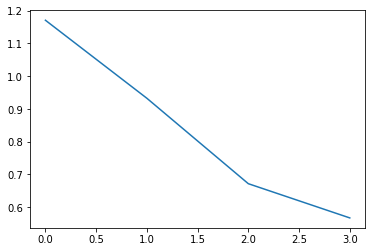

In [22]:
Gs = []
for frame_name,frame_var in frame_dict.items():
    G = get_G(frame_var)
    Gs.append(G)
    print(frame_name , ": " , G)
plt.plot(Gs)


# part 4

In [23]:
def get_e(frame):
    a = LPCC_with_levinson(frame)
    return frame - sum([a[k-1]*frame[-k] for k in range(len(frame))])

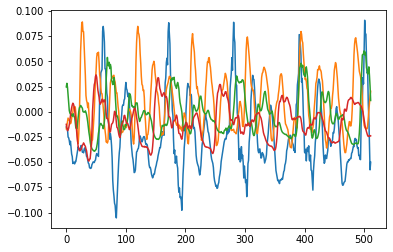

vowel_frame1  :
[-0.01511898 -0.01630917 -0.01710263 -0.0250372  -0.02576962 -0.02848568
 -0.03263607 -0.02915707 -0.03593197 -0.04200497 -0.04432431 -0.05131283
 -0.0502142  -0.0502142  -0.05170956 -0.04929867 -0.04951229 -0.04594174
 -0.04212704 -0.03831234 -0.03465023 -0.03678646 -0.03638974 -0.03657284
 -0.03669491 -0.03333798 -0.03687802 -0.0401434  -0.03974667 -0.04069271
 -0.03700009 -0.03577938 -0.03803769 -0.04041806 -0.04420224 -0.04484311
 -0.04789486 -0.05088559 -0.05167904 -0.05537167 -0.0559515  -0.05619564
 -0.05555478 -0.05244198 -0.05128231 -0.04978695 -0.04993954 -0.05033627
 -0.04859677 -0.04783383 -0.04386654 -0.04148617 -0.04295102 -0.04237118
 -0.04429379 -0.01875058  0.01307926  0.01799259  0.03880558  0.04051456
  0.0419794   0.08015689  0.08479557  0.07893619  0.06917057  0.04280338
  0.04265079  0.03212223  0.01884708  0.01466617 -0.00736752 -0.01145687
 -0.01582089 -0.02714291 -0.02158871 -0.02552548 -0.03358212 -0.04609433
 -0.06815854 -0.07768002 -0.0834173

In [24]:
es = {}
for frame_name,frame_var in frame_dict.items():
    e = get_e(frame_var)
    es[frame_name] = e
    plt.plot(e)
plt.show()

for frame_name , e in es.items():
    print(frame_name , " :")
    print(e)



# part 5

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


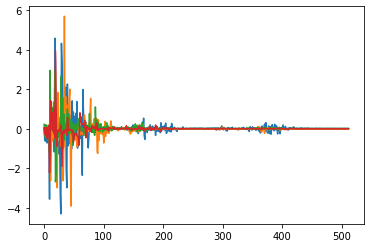

In [37]:
for frame_name ,frame_value in frame_dict.items():
    H = scipy.signal.freqz(frame_value)[1]
    plt.plot(H)
plt.show()

In [38]:
def get_H(frame):
    a = LPCC_with_toeplitz(frame_value)
    G = get_G(frame)
    b= np.array([G])
#     H = scipy.signal.freqz(b=b , a=a)[1] we can use this but it is diffrent a little
    H = G/np.fft.rfft(a)
    return H

C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\user\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


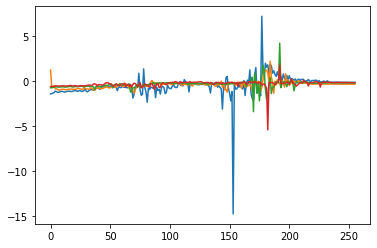

In [39]:
for frame_name ,frame_value in frame_dict.items():
    H = get_H(frame_value)
    plt.plot(H)
plt.show()

# part 6

for vowel_frame1:


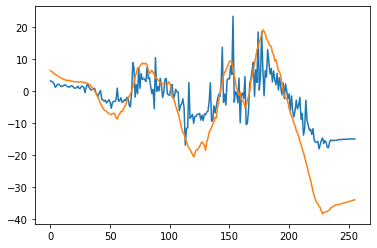

for vowel_frame2:


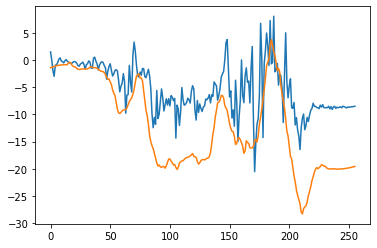

for voiced_frame1:


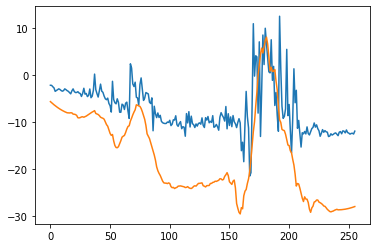

for voiced_frame2:


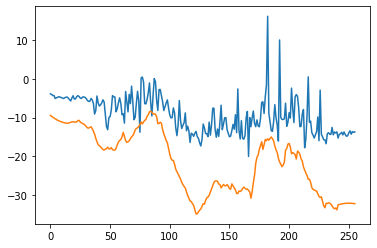

In [40]:
for frame_name ,frame_value in frame_dict.items():
    print(f"for {frame_name}:")
    H = get_H(frame_value)
    H_smooth = scipy.signal.savgol_filter(20*np.log(np.abs(H)),29,2)

    plt.plot(20*np.log10(1e-10 + np.abs(H)))
    plt.plot(H_smooth)
    plt.show()

# part 7

In [41]:
frame_size = 32/1000 # seconds
hop_size = 10/1000 # seconds
pre_emphasis_value = 0.97
window= "hamming"

def pre_emphasis(signal,pre_emphasis_value):
    return np.append(signal[0], signal[1:] - pre_emphasis_value * signal[:-1])

def framming(signal,frame_length,hop_size,sample_rate):
    frame_step = hop_size * sample_rate
    signal_lenght = len(signal)
    frame_length = int(round(frame_length))
    frame_step = int(round(frame_step))
    num_frames = int(np.ceil(float(np.abs(signal_lenght - frame_length)) / frame_step))
    pad_signal_length = num_frames * frame_step + frame_length
    z = np.zeros((pad_signal_length - signal_lenght))
    pad_signal = np.append(signal, z) 
    indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
    frames = pad_signal[indices.astype(np.int32, copy=False)]
    return frames

def windowing(frames , frame_length , window_type=np.hamming):
    if window_type is not None:
        return frames*window_type(frame_length)
    else:
        return frames
    
def preprocess(signal,sample_rate,frame_size,hop_size,pre_emphasis_value,window_type=np.hamming , use_emphasis=True):
    frame_length = frame_size*sample_rate
    if use_emphasis:
        signal = pre_emphasis(signal,pre_emphasis_value)
    framing_signals = framming(signal,frame_length,hop_size,sample_rate)
    return windowing(framing_signals,frame_length,window_type)
    

In [42]:
signal,sample_rate = read_voice("farsi_S29A2.wav")
frames = preprocess(signal,sample_rate,frame_size,hop_size,pre_emphasis_value,np.hamming) 

In [43]:
play_voice(signal,sample_rate)

rate = 8000


# part 8

### find voiced frame

In [44]:
magnitude_frames = abs(np.fft.rfft(frames,512))
pitches = get_mean_pithes(magnitud_frames=frames,sample_rate=sample_rate)
np.where(pitches>0)

(array([ 168,  169,  170, ..., 4463, 4464, 4465], dtype=int64),)

In [45]:
play_voice(np.concatenate(frames[:168+1]),rate=sample_rate) # for /d/
voiced_frame = frames[168]

rate = 8000


## plot of frequency 

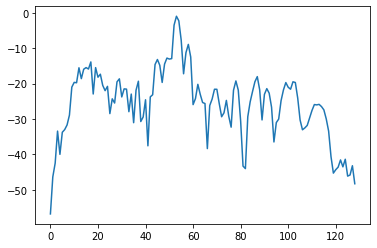

In [46]:
plt.plot(20*np.log10(np.abs(np.fft.rfft(voiced_frame))))

# part 9

## part a

In [47]:
def log_short_time_energy(frame):
    return np.log10(np.sum(frame**2)/len(frame))

In [48]:
log_short_time_energies = np.apply_along_axis(log_short_time_energy,axis=1,arr=frames)

In [49]:
log_short_time_energies

array([-3.54640237, -3.36012639, -3.25514712, ..., -4.53682013,
       -4.72597296, -4.94589202])

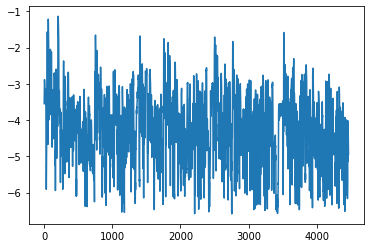

In [50]:
plt.plot(log_short_time_energies)

### part  b

In [51]:
silences = np.where(log_short_time_energies<-5.5)

In [52]:
print(f"count of silence frames= {len(silences[0])}")
print(f"index of silence frames = {silences[0]}")

count of silence frames= 548
index of silence frames = [  30   31   32   33   34  164  165  166  238  239  272  273  274  365
  468  469  470  471  472  473  474  475  476  597  598  599  601  602
  603  604  626  627  628  629  630  726  727  728  735  736  737  738
  739  850  851  852  853  854  888  889  890  905  906  907  908  909
  910  911  912  966  967 1009 1024 1025 1026 1027 1029 1076 1077 1078
 1079 1083 1108 1109 1110 1111 1121 1135 1136 1137 1138 1139 1140 1141
 1142 1143 1169 1170 1171 1172 1173 1174 1175 1176 1177 1270 1271 1272
 1273 1274 1275 1276 1277 1278 1332 1333 1334 1335 1336 1337 1338 1339
 1340 1341 1342 1343 1397 1398 1399 1400 1458 1459 1460 1517 1518 1519
 1614 1615 1616 1617 1674 1675 1695 1696 1697 1698 1739 1740 1741 1742
 1743 1744 1745 1746 1782 1783 1851 1852 1853 1889 1890 1891 1892 1907
 1908 1909 1910 1911 1912 1913 1963 1964 1965 1999 2000 2001 2002 2003
 2004 2005 2006 2007 2043 2044 2045 2060 2061 2062 2071 2118 2119 2120
 2121 2122 2123 2124 2

## part d

In [53]:
frame_size = 32/1000 # seconds
hop_size = 10/1000 # seconds
pre_emphasis_value = 0.97
window= "hamming"


def VAD(wavData):
    # uses the librosa library to compute short-term energy
    ste = librosa.feature.rms(wavData,hop_length=80).T
    thresh = 0.1*(np.percentile(ste,97.5) + 9*np.percentile(ste,2.5))    # Trim 5% off and set threshold as 0.1x of the ste range
    return (ste>thresh).astype('bool')

In [54]:
np.where(VAD(signal)==False)[0]

array([ 261,  262,  263,  264,  265,  266,  267,  268,  269,  270,  439,
        440,  441,  442,  443,  444,  445,  542,  543,  544,  545,  546,
        547,  548,  549,  550,  551,  552,  567,  568,  569,  600,  602,
        603,  604,  605,  606,  607,  608,  609,  610,  611,  612,  613,
        614,  615,  616,  617,  618,  619,  620,  621,  622,  623,  624,
        625,  626,  627,  628,  629,  630,  631,  632,  633,  634,  635,
        636,  637,  638,  671,  672,  673,  674,  677,  678,  679,  680,
        681,  682,  683,  684,  685,  686,  687,  688,  689,  690,  691,
        692,  693,  694,  695,  696,  697,  698,  699,  700,  701,  702,
        703,  704,  705,  706,  707,  708,  709,  710,  711,  712,  713,
        714,  715,  716,  717,  718,  719,  720,  721,  722,  723,  724,
        725,  726,  727,  728,  729,  730,  731,  732,  733,  734,  735,
        737,  738,  972,  973,  974,  975,  976,  977, 1132, 1133, 1134,
       1170, 1171, 1172, 1173, 1174, 1175, 1176, 11